# Esame Laboratorio di Programmazione II - 27/06/2025


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [17]:
prezzi = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])

media = prezzi.mean()
print("Prezzo medio:", media)

sopra_media = prezzi[prezzi > media]
print("Libri con prezzo > media:", sopra_media)

sconto = prezzi.copy()
sconto[prezzi > media] *= 0.9
print("Prezzi scontati:", sconto)

Prezzo medio: 18.983000000000004
Libri con prezzo > media: [22.5  31.2  24.9  19.99 27.3 ]
Prezzi scontati: [14.99  20.25   9.75  18.    28.08  12.8   22.41   8.4   17.991 24.57 ]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

[np.float64(0.34), np.float64(0.34), np.float64(0.37333333333333335), np.float64(0.345), np.float64(0.356), np.float64(0.35333333333333333), np.float64(0.3485714285714286), np.float64(0.355), np.float64(0.35777777777777775), np.float64(0.348), np.float64(0.3418181818181818), np.float64(0.34), np.float64(0.3353846153846154), np.float64(0.34), np.float64(0.348), np.float64(0.34625), np.float64(0.3423529411764706), np.float64(0.3388888888888889), np.float64(0.33789473684210525), np.float64(0.336)]


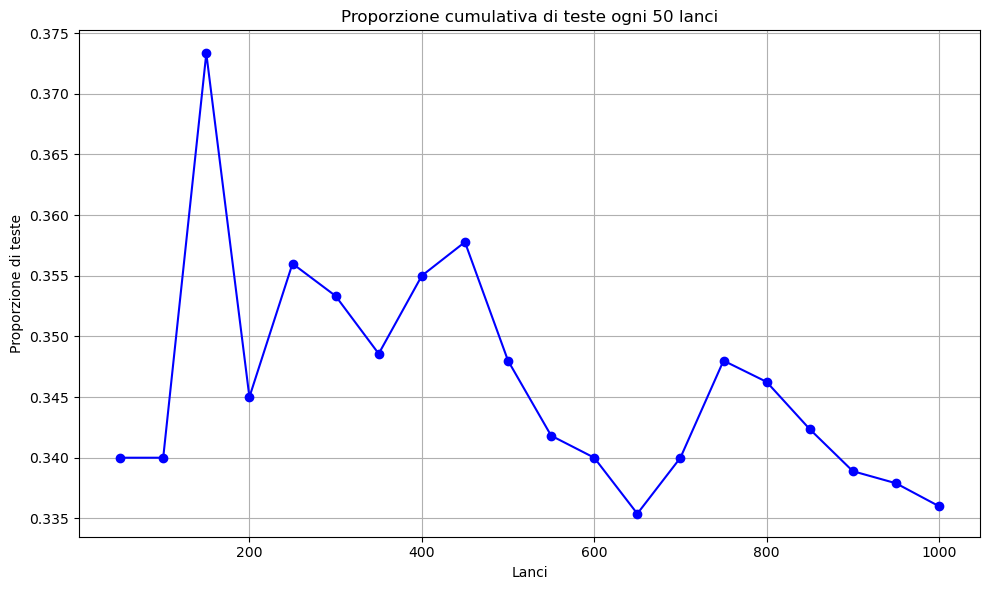

In [41]:
n_lanci = 1000

# 1. array con i risultati per 1.000 lanci
risultati = np.random.choice([0,1], size=n_lanci, p=[2/3, 1/3])

# 2. proporzione di teste dopo ogni 50 lanci cumulativi
steps = np.arange(50, 1001, 50)
proportions = [risultati[:i].mean() for i in steps]
print(proportions)

# 3. plot
plt.figure(figsize=(10,6))
plt.plot(steps, proportions, marker='o', color='blue')
plt.title('Proporzione cumulativa di teste ogni 50 lanci')
plt.xlabel('Lanci')
plt.ylabel('Proporzione di teste')
plt.grid()
plt.tight_layout()
plt.show()


## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [18]:
def mat_normalizzata(matrice):
    # calcolo media e deviazione standard
    mat_mean = np.mean(matrice, axis=1, keepdims=True)
    mat_std = np.std(matrice, axis=1, keepdims=True)

    # normalizzazione
    mat_norm = (matrice - mat_mean) / mat_std

    return mat_norm

# test con array 6x10 con numeri campionati da una distribuzione normale (5, 2)
np.random.seed(0)

mat = np.random.normal(loc=5, scale=2, size=(6,10))
norm = mat_normalizzata(mat)

print(f'matrice prima della normalizzazione: \n{mat}\n')

print(f'matrice dopo la normalizzazione: \n{norm}')

matrice prima della normalizzazione: 
[[ 8.52810469  5.80031442  6.95747597  9.4817864   8.73511598  3.04544424
   6.90017684  4.69728558  4.7935623   5.821197  ]
 [ 5.28808714  7.90854701  6.52207545  5.24335003  5.88772647  5.66734865
   7.98815815  4.58968347  5.6261354   3.29180852]
 [-0.10597963  6.30723719  6.7288724   3.51566996  9.53950925  2.09126865
   5.09151703  4.6256323   8.06555843  7.93871754]
 [ 5.30989485  5.75632504  3.2244285   1.03840706  4.3041757   5.31269794
   7.46058136  7.4047597   4.22534637  4.3953945 ]
 [ 2.90289407  2.15996413  1.58745962  8.90155079  3.98069564  4.1238514
   2.49440928  6.55498071  1.7722043   4.57451944]
 [ 3.20906688  5.773805    3.97838972  2.63873563  4.94363554  5.85666374
   5.13303444  5.6049438   3.73135581  4.27451767]]

matrice dopo la normalizzazione: 
[[ 1.06095671 -0.34936741  0.2489091   1.55402992  1.16798583 -1.7736924
   0.21928426 -0.91965619 -0.86987913 -0.33857068]
 [-0.38105495  1.56463812  0.53518213 -0.41427228  0.

## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


Libro con engagement massimo: Harry Potter and the Philosopher's Stone (score: 29.583684080225655)

                                 original_title  average_rating
17    Harry Potter and the Prisoner of Azkaban            4.53
23         Harry Potter and the Goblet of Fire            4.53
24        Harry Potter and the Deathly Hallows            4.61
26      Harry Potter and the Half-Blood Prince            4.54
134                          A Storm of Swords            4.54
...                                        ...             ...
9568                           The Hate U Give            4.62
9711                               Magic Binds            4.57
9780                                会長はメイド様! 2            4.53
9805                              ONE PIECE 38            4.63
9922     The Green Mile, Part 5: Night Journey            4.51

[129 rows x 2 columns]


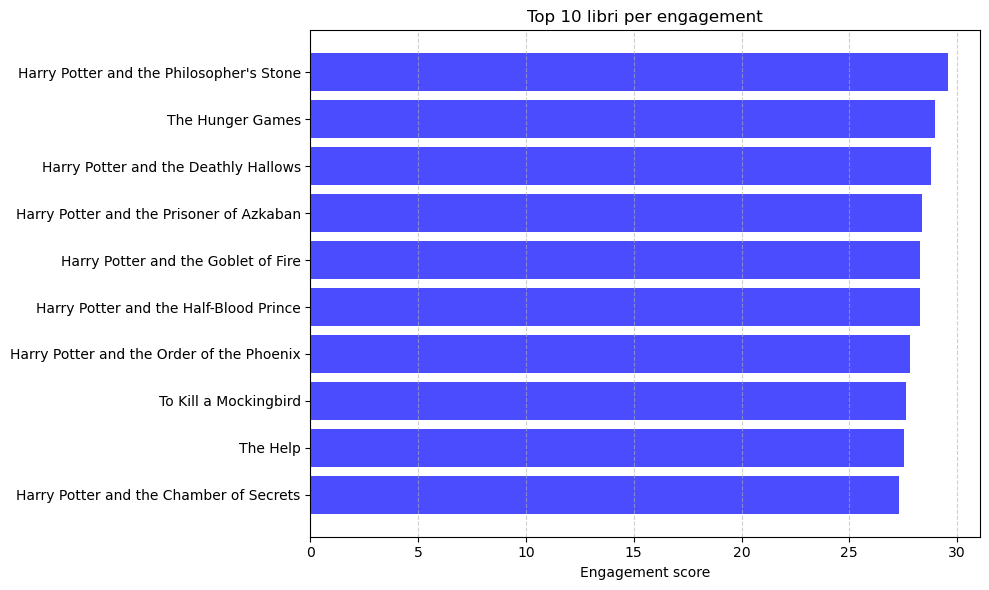

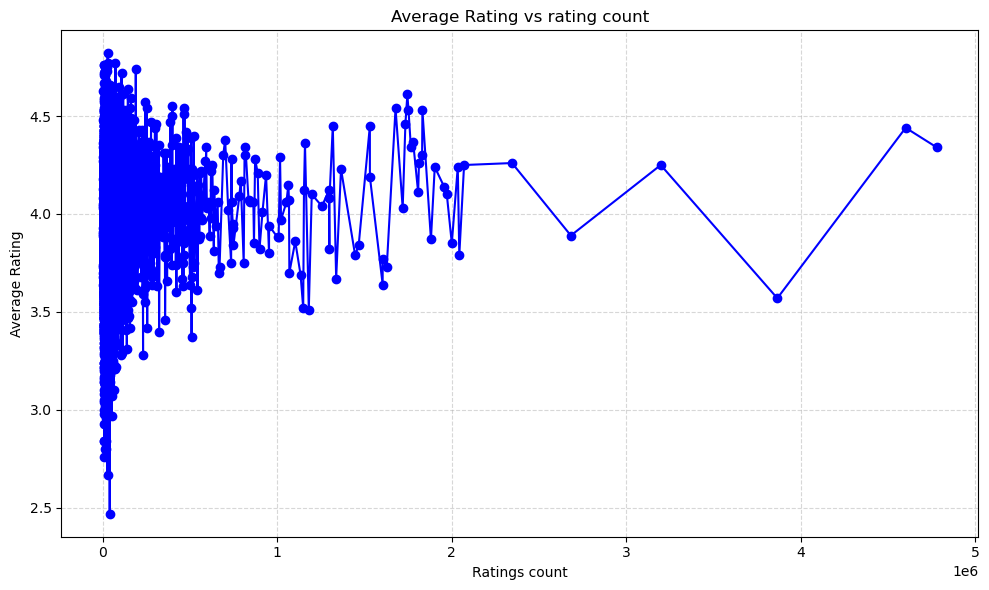

In [19]:
# caricamento file del dataset
df = pd.read_csv('books.csv')

# 1. crea nuova colonna engagement_score
df['engagement_score'] = df['average_rating'] * np.log10(1 + df['ratings_count'])

# 2. libro con valore massimo di engagement_score
libro_max = df.loc[df['engagement_score'].idxmax(), 'original_title']
max_score = df['engagement_score'].max()
print(f'Libro con engagement massimo: {libro_max} (score: {max_score})')

# 3. filtra i libri con average_rating>4.5
libri_filtrati = df[df['average_rating'] > 4.5]
print('\n',libri_filtrati[['original_title', 'average_rating']])

# 4. grafico a barre con i 10 libri con il valore più alto di engagement_score
top_10 = df.sort_values(by='engagement_score', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10['original_title'], top_10['engagement_score'], color='blue', alpha=0.7)
plt.title('Top 10 libri per engagement')
plt.xlabel('Engagement score')
plt.tight_layout()
plt.gca().invert_yaxis() # libro con punteggio più alto per primo
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# 5. grafico a linee della average_rating ordinando i libri per ratings_count crescente
df_sorted = df.sort_values(by='ratings_count')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['ratings_count'], df_sorted['average_rating'], marker='o', linestyle='-', color='blue')

plt.xlabel('Ratings count')
plt.ylabel('Average Rating')
plt.title('Average Rating vs rating count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


Righe del dataset: 32561
Colonne del dataset: 15

Valori mancanti per colonna:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Età media per sesso: 
sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

Percentuale di donne con income > 50K: 3.62%
Percentuale di uomini con income > 50K: 20.46%


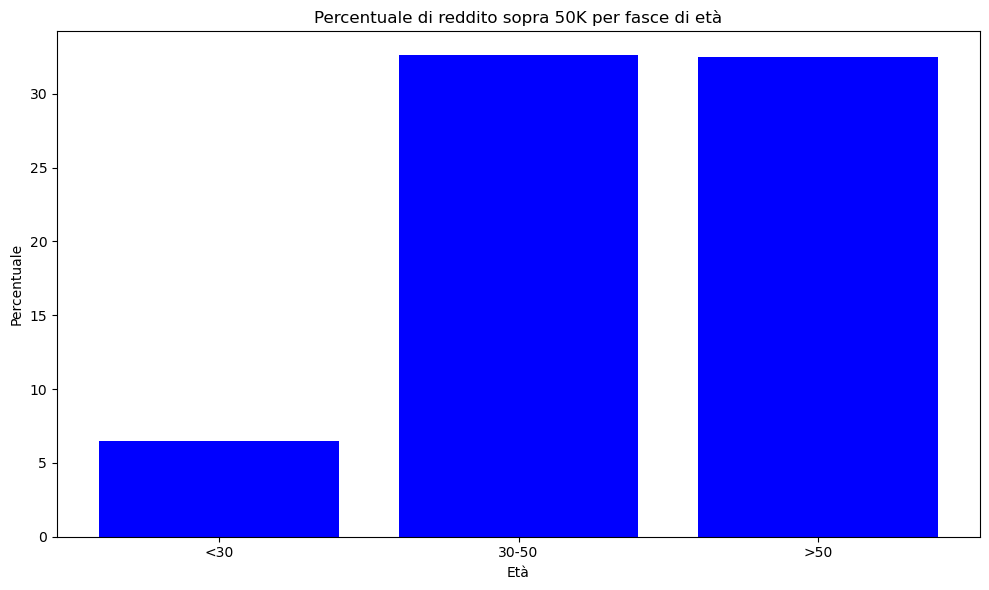

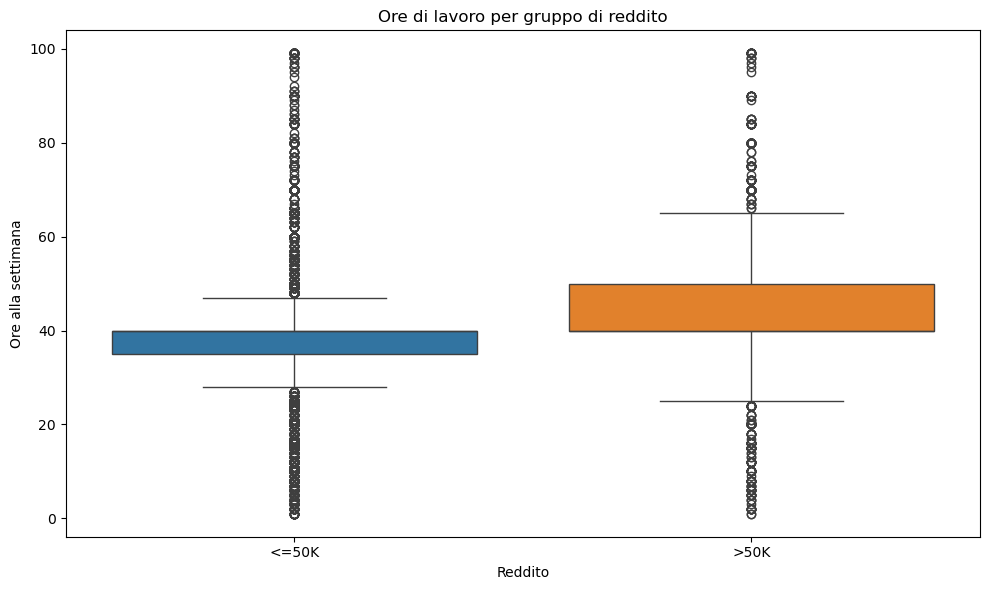

In [26]:
df_adult = pd.read_csv('adult_con_titoli.csv', na_values='?', skipinitialspace=True)

# 1. righe e colonne dataset
print(f'Righe del dataset: {df_adult.shape[0]}')
print(f'Colonne del dataset: {df_adult.shape[1]}')

# 2. valori mancanti per colonna
print('\nValori mancanti per colonna:')
print(df_adult.isna().sum())

# 3. sostituire val mancanti nelle colonne workclass, occupation, native-country con la moda
moda_workclass = df_adult['workclass'].mode().iloc[0]
moda_occupation = df_adult['occupation'].mode().iloc[0]
moda_native = df_adult['native-country'].mode().iloc[0]

df_adult['workclass'] = df_adult['workclass'].fillna(moda_workclass)
df_adult['occupation'] = df_adult['occupation'].fillna(moda_occupation)
df_adult['native-country'] = df_adult['native-country'].fillna(moda_native)

# 4. età media per sesso
print('\nEtà media per sesso: ')
print(df_adult.groupby('sex')['age'].mean())

# 5. percentuale di persone che guadagnano >50k per sesso
tot = len(df_adult['income'])
magg50_f = len(df_adult[(df_adult['income'] == '>50K') & (df_adult['sex'] == 'Female')])
magg50_m = len(df_adult[(df_adult['income'] == '>50K') & (df_adult['sex'] == 'Male')])

perc_f = magg50_f / tot * 100
perc_m = magg50_m / tot * 100
print(f'\nPercentuale di donne con income > 50K: {perc_f:.2f}%')
print(f'Percentuale di uomini con income > 50K: {perc_m:.2f}%')

# 6. creare colonna age_group
max_age = df_adult['age'].max()
df_adult['age_group'] = pd.cut(df_adult['age'], bins=[0, 30, 50, max_age], labels=['<30', '30-50', '>50'], include_lowest=True)

# 7. barplot 
plt.figure(figsize=(10,6))

proporzione = (df_adult['income'] == '>50K').groupby(df_adult['age_group'], observed=True).mean()
x = proporzione.index
y = proporzione.values * 100

plt.bar(x,y, color='blue')
plt.title('Percentuale di reddito sopra 50K per fasce di età')
plt.xlabel('Età')
plt.ylabel('Percentuale')
plt.tight_layout()
plt.show()

# 7. boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_adult, x='income', y='hours-per-week', hue='income')
plt.title('Ore di lavoro per gruppo di reddito')
plt.xlabel('Reddito')
plt.ylabel('Ore alla settimana')
plt.tight_layout()
plt.show()

## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

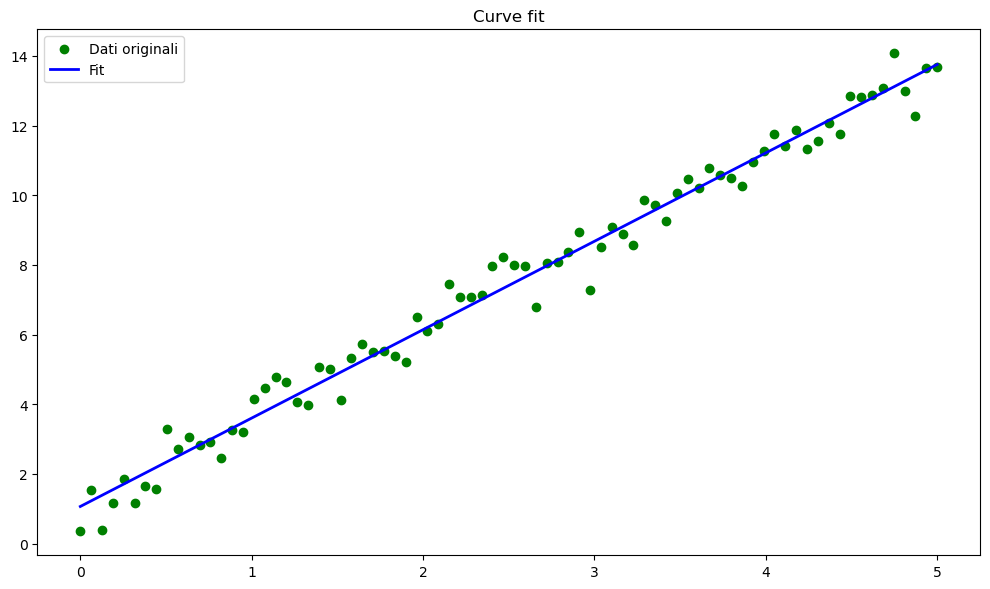

MAE =  0.39139377732964004
RMSE =  0.4969356208080399


In [32]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# modello lineare
def linear_model(x, a , b):
    return a * x + b

x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

# stima dei parametri (a,b)
popt, _ = curve_fit(linear_model, x, y)
a, b = popt
y_pred = linear_model(x, a, b)

# plot
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Dati originali', color='green')
plt.plot(x, y_pred, label='Fit', color='blue', linewidth=2)
plt.title('Curve fit')
plt.tight_layout()
plt.legend()
plt.show()

# MAE e RMSE
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
print('MAE = ', mae)
print('RMSE = ', rmse)
